In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

class complex:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.rad=np.sqrt(x**2+y**2)
        self.arg=np.arctan2(x,y)

    def add(self,a):
        return complex(self.x + a.x, self.y + a.y)

    def multiply(self,a):
        return complex(self.x*a.x-self.y*a.y,self.x*a.y+self.y*a.x)

    def square(self):
        return self.multiply(self)

    def reciprocal(self):
        return complex(self.x/(self.x**2+self.y**2),-1*self.y/(self.x**2+self.y**2))

    def exponential(self):
        r=np.exp(self.x)
        arg=self.y
        return complex(r*np.sin(arg),r*np.cos(arg))

    def log(self,bc=0):
        bc1=bc
        bc2=bc+2*np.pi
        arg=self.arg
        while arg < bc1:
            arg+=2*np.pi
        while arg > bc2:
            arg-=2*np.pi
        return complex(np.log(self.rad),arg)

    def cra(self):
        return cra(self.rad,self.arg)

    def expcra(self):
        return cra(np.exp(self.x),self.y)

class crs:
    def __init__(self,rad,arg,branch):
        self.rad=rad
        self.arg=arg
        self.branch=branch
        self.x=rad*np.cos(arg)
        self.y=rad*np.sin(arg)

    def cra(self):
        return cra(self.rad,self.arg+2*np.pi*self.branch)

class cra:
    def __init__(self,rad,arg):
        self.rad=rad
        self.arg=arg
        self.x=rad*np.cos(arg)
        self.y=rad*np.sin(arg)

    def log(self):
        return complex(np.log(self.rad),self.arg)

    def exp(self):
        return cra(np.exp(self.x),self.y)

    def crs(self):
        a=self.arg % (2*np.pi)
        return crs(self.rad,a,round(((self.arg-a)/(2*np.pi))))

    def complex(self):
        return complex(self.r*np.cos(self.arg),self.r*np.sin(self.arg))

#Cra stands for Complex-radius-argument. It defines a class for complex numbers in polar coordinates. Notably, the argument
#can hold any value, as there is not a single sheet of the Riemann surface specified. For example, cra(1,2pi) is distinct from
#cra(1,4pi). This will allow us to keep track of which branch we're operating on

constlist = [0,1,-3,2,5,6,10,4,0,0,5,3,1,0]

startlist=[]
for i in range(2):
    for j in range(2):
        for k in range(4):
            if i % 2 == 0:
                startlist.append(crs((i+1)*(j+2),np.pi/4+np.pi/2*j,k))
            else:
                startlist.append(crs((i+1)*(j+2),np.pi/2*(j+1),k))
list1=[i.x for i in startlist if i.branch==0]
list2=[i.y for i in startlist if i.branch==0]

coordinates = {}

for i in range(16):
    binary = format(i, '04b')
    coordinates[binary] = startlist[i]

reverse_coordinates = {v: k for k, v in coordinates.items()}

def toBinary(message):
    binary = ''.join(format(ord(i), '08b') for i in message)

    return binary

def binaryToList(number):
    length = len(number)
    nums = []

    for i in range(int(length / 4)):
        nums.append(number[i*4:(i*4)+4])
    
    return nums

def listToComplex(nums):
    cnums = []
    for num in nums:
        cnums.append(coordinates[num])

    return cnums
    
def printCoordinates(nums):
    for i in nums:
        r = str(i.rad)
        t = str(i.arg)
        b = str(i.branch)
        print("(" + r + ", " + t + ", " + b + ")")

def Parker_Scramble(crslist,constlist):
    cartesianlist = [(i.cra()).log() for i in crslist]
    #Takes the logarithm of each point in our list of points, factoring in which branch they lie on.

    loglist = [(i.add(complex(constlist[0],constlist[1]))).log() for i in cartesianlist]
    #This step and all of the following loglist steps add two of the constants to each element of the list and
    #then take the logarighm of them

    loglist2= [(i.add(complex(constlist[2],constlist[3]))).log() for i in loglist]
    loglist3= [(i.add(complex(constlist[4],constlist[5]))).log(bc=rand.randint(0,10)*200*np.pi) for i in loglist2]
    #The branch specification here randomizes which branch the log function operates over in order to spread out
    #the points more

    loglist4= [(i.add(complex(constlist[6],constlist[7]))).log(bc=rand.randint(0,100)*200*np.pi) for i in loglist3]
    loglist5= [(i.add(complex(constlist[8],constlist[9]))).log(bc=rand.randint(0,4)*2*np.pi) for i in loglist4]
    radexpandlist=  [complex((i.rad+1)*np.cos(i.arg),(i.rad+1)*np.sin(i.arg)) for i in loglist5]
    #increases the radius of each of the complex points by one, so that none of them fall inside the unit circle

    inverselist=[(i).reciprocal() for i in radexpandlist]
    #Takes the reciprocal of all of the points, so that all of them are inside the unit circle

    preexplist=[(i.add(complex(0.5,1))) for i in inverselist]
    #Shifts the points so that none of them fall near the origin, by Rouche's theorem

    explist = [((i.add(complex(constlist[8],constlist[9])))).expcra() for i in preexplist]
    finallist=[i.crs() for i in explist]

    return finallist

def Reverse_Parker_Scramble(crslist,constlist):
    explist=[i.cra() for i in crslist]

    preexplist=[(i.log()).add(complex(-1*constlist[8],-1*constlist[9])) for i in explist]

    inverselist=[i.add(complex(-0.5,-1)) for i in preexplist]

    radexpandlist=[i.reciprocal() for i in inverselist]

    loglist5=[complex((i.rad-1)*np.cos(i.arg),(i.rad-1)*np.sin(i.arg)) for i in radexpandlist]
    loglist4=[(i.exponential()).add(complex(-1*constlist[8],-1*constlist[9])) for i in loglist5]
    loglist3=[(i.exponential()).add(complex(-1*constlist[6],-1*constlist[7])) for i in loglist4]
    loglist2=[(i.exponential()).add(complex(-1*constlist[4],-1*constlist[5])) for i in loglist3]
    loglist =[(i.exponential()).add(complex(-1*constlist[2],-1*constlist[3])) for i in loglist2]

    cartesianlist=[(i.exponential()).add(complex(-1*constlist[0],-1*constlist[1])) for i in loglist]

    finallist=[(i.expcra()).crs() for i in cartesianlist]

    return finallist

def approximate(cnums):
    new_nums = []
  
    for cnum in cnums:
        r = int(round(cnum.rad))

        if (r == 2):
            new_nums.append(startlist[cnum.branch])
        elif (r == 3):
            new_nums.append(startlist[4 + cnum.branch])
        elif (r == 4):
            new_nums.append(startlist[8 + cnum.branch])
        elif (r == 6):
            new_nums.append(startlist[12 + cnum.branch])

    return new_nums

def complexToList(cnums):
    nums = []
    for cnum in cnums:
        nums.append(reverse_coordinates[cnum])
    
    return nums

def listToBinary(nums):
    bin_str = ""
    for n in nums:
        bin_str += n
    
    return bin_str
    
def binaryToMessage(bin_str):
    dec_nums = []

    for i in range(int(len(bin_str) / 8)):
        dec_nums.append(int(bin_str[i * 8: (i*8) + 8], 2))

    chars = []
    for num in dec_nums:
        chars.append(chr(num))

    m = ""
    for c in chars:
        m += c

    return m

In [50]:
message = input("Enter a message to transmit:\n")

binary_message = toBinary(message)
print(binary_message)

Enter a message to transmit:
 Hello


0100100001100101011011000110110001101111


In [51]:
message_list = binaryToList(binary_message)
for m in message_list:
    print(m)

0100
1000
0110
0101
0110
1100
0110
1100
0110
1111


(3, 2.356194490192345, 0)
(4, 1.5707963267948966, 0)
(3, 2.356194490192345, 2)
(3, 2.356194490192345, 1)
(3, 2.356194490192345, 2)
(6, 3.141592653589793, 0)
(3, 2.356194490192345, 2)
(6, 3.141592653589793, 0)
(3, 2.356194490192345, 2)
(6, 3.141592653589793, 3)


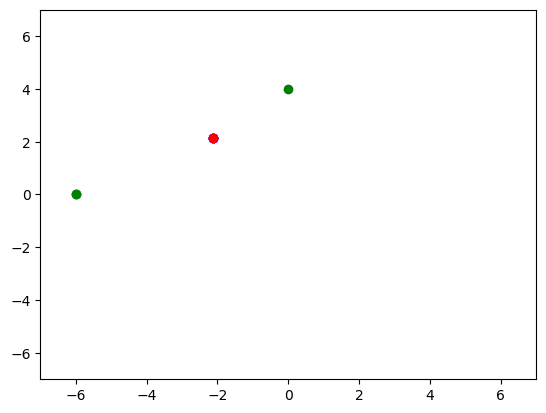

In [58]:
colorlist=['red','green','blue','violet']

complex_list = listToComplex(message_list)
printCoordinates(complex_list)
xlist = [c.x for c in complex_list]
ylist = [c.y for c in complex_list]
for i in range(int(len(complex_list))):
    plt.plot(xlist[i], ylist[i], 'o', c = colorlist[(i % 4)])
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

(1.7248938838423469, 0.9633252584951066, 0)
(1.709256477644184, 0.9365966029627417, 0)
(1.7308730754952488, 0.9643420898580743, 0)
(1.7198616221614467, 0.9335978306961682, 0)
(1.7276710269118043, 0.9637513465725073, 0)
(1.7027256520921965, 0.9859111663291159, 0)
(1.6487334863129106, 0.9026883465948541, 0)
(1.6487256282749185, 0.9109308910128616, 0)
(1.7136045570445257, 0.9352685822618952, 0)
(1.7101207731912946, 0.936321336363392, 0)


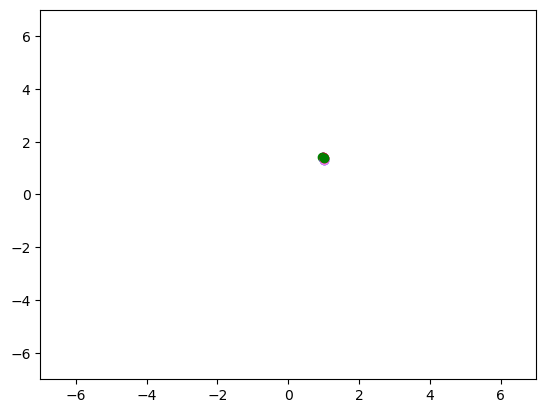

In [59]:
encrypted = Parker_Scramble(complex_list, constlist)
printCoordinates(encrypted)
xlist = [c.x for c in encrypted]
ylist = [c.y for c in encrypted]
for i in range(int(len(encrypted))):
    plt.plot(xlist[i], ylist[i], 'o', c = colorlist[i % 4])
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

(3.0062559450765494, 2.3564947662527698, 0)
(3.996627403780247, 1.5708630288096463, 0)
(3.0014381332067495, 2.3564474981011916, 2)
(3.001836274752374, 2.356698882097863, 1)
(3.001382115039492, 2.356522430546411, 2)
(5.969230879324914, 3.1392934328873325, 0)
(3.000282714329146, 2.356252158544386, 2)
(6.008891367451399, 3.141857173484694, 0)
(3.0010422977757423, 2.3572393063589647, 2)
(5.920401714575488, 3.1289040138337043, 3)


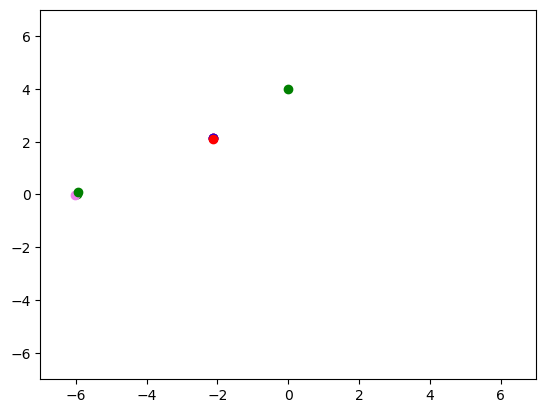

In [60]:
decrypted = Reverse_Parker_Scramble(encrypted, constlist)
printCoordinates(decrypted)
xlist = [c.x for c in decrypted]
ylist = [c.y for c in decrypted]
for i in range(int(len(decrypted))):
    plt.plot(xlist[i], ylist[i], 'o', c = colorlist[i % 4])
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

(3, 2.356194490192345, 0)
(4, 1.5707963267948966, 0)
(3, 2.356194490192345, 2)
(3, 2.356194490192345, 1)
(3, 2.356194490192345, 2)
(6, 3.141592653589793, 0)
(3, 2.356194490192345, 2)
(6, 3.141592653589793, 0)
(3, 2.356194490192345, 2)
(6, 3.141592653589793, 3)


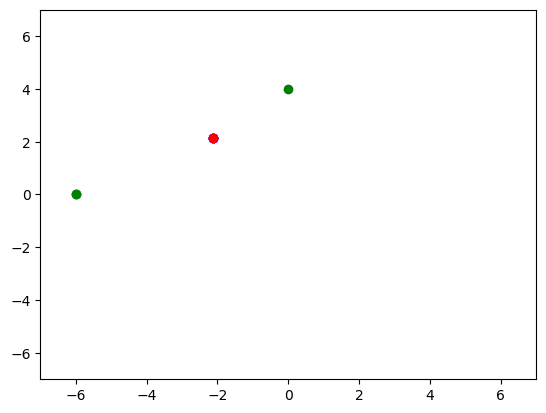

In [62]:
approximated = approximate(decrypted)
printCoordinates(approximated)
xlist = [c.x for c in approximated]
ylist = [c.y for c in approximated]
for i in range(int(len(approximated))):
    plt.plot(xlist[i], ylist[i], 'o', c = colorlist[i % 4])
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

In [63]:
decoded = complexToList(approximated)
for m in decoded:
    print(m)

0100
1000
0110
0101
0110
1100
0110
1100
0110
1111


In [64]:
new_bin_str = listToBinary(decoded)
new_message = binaryToMessage(new_bin_str)
print("\nThe received message is:")
print(new_message)


The received message is:
Hello
